## importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Importing Dataset

In [2]:
train_dir = './train/'
test_dir = './test/'

## Creating Training and test Data

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=128,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=128,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [223]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

## Defining Model

In [4]:
model = tf.keras.models.Sequential()   

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(7, activation='softmax'))

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',
              metrics=METRICS)

In [107]:
earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.5, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)

callbacks = [reduce_lr]

## Training Model

In [108]:
hist = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=100,
                 callbacks=callbacks,
                 )

Epoch 1/100
225/225 [==============================] - 80s 348ms/step - loss: 12.5451 - accuracy: 0.2578 - precision: 0.2866 - recall: 0.0432 - auc: 0.6520 - val_loss: 14.1611 - val_accuracy: 0.0741 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4016 - lr: 1.0000e-04
Epoch 2/100
225/225 [==============================] - 74s 329ms/step - loss: 10.5944 - accuracy: 0.3108 - precision: 0.5731 - recall: 0.0536 - auc: 0.7116 - val_loss: 11.0919 - val_accuracy: 0.1994 - val_precision: 0.2062 - val_recall: 0.1732 - val_auc: 0.6149 - lr: 1.0000e-04
Epoch 3/100
225/225 [==============================] - 75s 331ms/step - loss: 8.8261 - accuracy: 0.3491 - precision: 0.6316 - recall: 0.0920 - auc: 0.7418 - val_loss: 8.2666 - val_accuracy: 0.3714 - val_precision: 0.4342 - val_recall: 0.2855 - val_auc: 0.7557 - lr: 1.0000e-04
Epoch 4/100
225/225 [==============================] - 75s 333ms/step - loss: 7.2654 - accuracy: 0.3716 - precision: 0.6671 - recall: 0.1222 - auc: 0.7601 - 

Epoch 59/100
225/225 [==============================] - 75s 333ms/step - loss: 0.8177 - accuracy: 0.7675 - precision: 0.8345 - recall: 0.6901 - auc: 0.9657 - val_loss: 1.1326 - val_accuracy: 0.6778 - val_precision: 0.7403 - val_recall: 0.6166 - val_auc: 0.9305 - lr: 5.0000e-05
Epoch 60/100
225/225 [==============================] - 74s 331ms/step - loss: 0.8060 - accuracy: 0.7698 - precision: 0.8397 - recall: 0.6983 - auc: 0.9668 - val_loss: 1.1220 - val_accuracy: 0.6772 - val_precision: 0.7541 - val_recall: 0.6023 - val_auc: 0.9298 - lr: 5.0000e-05
Epoch 61/100
225/225 [==============================] - 75s 333ms/step - loss: 0.8020 - accuracy: 0.7727 - precision: 0.8399 - recall: 0.6986 - auc: 0.9672 - val_loss: 1.1228 - val_accuracy: 0.6811 - val_precision: 0.7464 - val_recall: 0.6209 - val_auc: 0.9315 - lr: 5.0000e-05
Epoch 62/100
225/225 [==============================] - ETA: 0s - loss: 0.7935 - accuracy: 0.7736 - precision: 0.8393 - recall: 0.7029 - auc: 0.9680
Epoch 00062: Redu

In [115]:
model.save_weights('./FER2013_model_weights.h5')

# final accuracy on test_set = 69.64 %

## Metrics plot

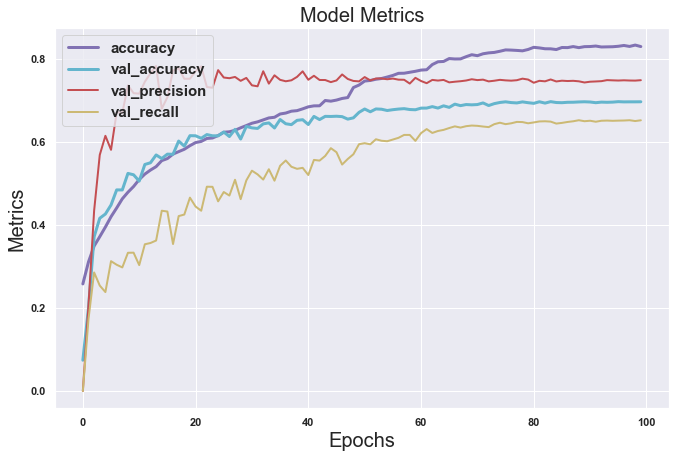

In [216]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(11,7))
plt.plot(hist.history['accuracy'], color='m', linewidth=3.0)
plt.plot(hist.history['val_accuracy'], color='c',linewidth=3.0 )
plt.plot(hist.history['val_precision'], color='r',linewidth=2.0 )
plt.plot(hist.history['val_recall'], color='y',linewidth=2.0 )
plt.title('Model Metrics',fontsize = 20 )
plt.ylabel('Metrics',fontsize = 20)
plt.xlabel('Epochs',fontsize = 20)
plt.legend(['accuracy', 'val_accuracy','val_precision','val_recall'], loc='upper left',fontsize = 15)
plt.show()


# Confusion matrix on test_set

In [221]:
# first run the cnn model cell.

In [5]:
model.load_weights('./FER2013_model_weights.h5')

In [7]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(test_set.classes, y_pred)

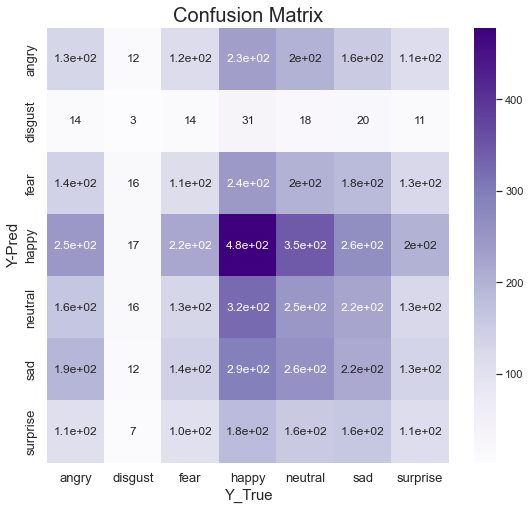

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
DetaFrame_cm = pd.DataFrame(cm, range(7), range(7))
p = sns.heatmap(DetaFrame_cm , cmap='Purples', annot=True)
p.set_title("Confusion Matrix",fontsize = 20)
sns.set(rc = {'figure.figsize':(10,9)})
sns.set(font_scale = 1)
p.set_yticklabels(labels, size = 13)
p.set_xticklabels(labels, size = 13)
p.set_xlabel("Y_True", fontsize = 15)
p.set_ylabel("Y-Pred", fontsize = 15)
plt.show()

# train and test data distributions.

<AxesSubplot:>

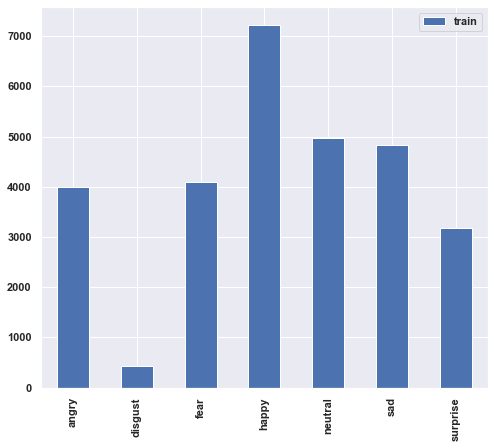

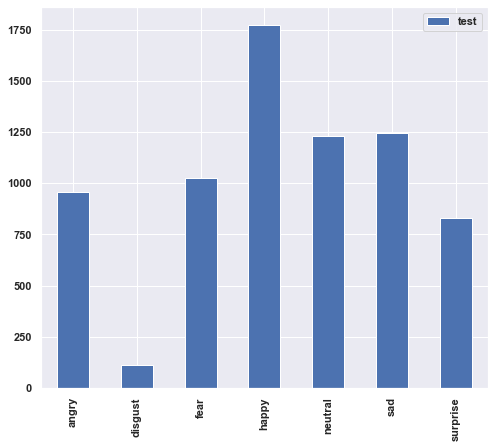

In [224]:
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
train_count.transpose().plot(kind='bar')
test_count.transpose().plot(kind='bar')